# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [6]:
# On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st

import datetime as dt
import locale
locale.setlocale(locale.LC_TIME, 'French_France.1252')
pd.set_option('display.float_format', '{:,.2f}'.format)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


In [7]:
# On importe les données dans un dataframe
df=pd.read_csv("Historique_immobilier_paris_2017_2021.csv", sep=';')
df_bien=pd.read_csv("Listes_biens_immobiliers_LPBL.csv", sep=';')
df_a_classer = pd.read_csv("Echantillon_donnees_a_classer_clusturing.csv", sep=';')
df_classmt_solution = pd.read_excel("echantillon_a_classer_solution.xlsx")
df.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03 00:00:00,"550559,6781",8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12 00:00:00,"1576492,459",32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10 00:00:00,"657757,3562",52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10 00:00:00,"250086,8233",64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13 00:00:00,"176266,7075",25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [9]:
# On vérifie que le type des données attribué par pandas est cohérent
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date_mutation     26196 non-null  object
 1   valeur_fonciere   26196 non-null  object
 2   adresse_numero    26196 non-null  int64 
 3   adresse_nom_voie  26196 non-null  object
 4   code_postal       26196 non-null  int64 
 5   nom_commune       26196 non-null  object
 6   code_type_local   26196 non-null  int64 
 7   type_local        26196 non-null  object
 8   surface_reelle    26196 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.8+ MB


In [10]:
# Test conversion date_mutation :
temp_dates = pd.to_datetime(df['date_mutation'], errors='coerce')
if temp_dates.isna().any():
    print("Erreur : certaines dates sont invalides.")
else:
    print("Il n'y a pas d'erreur à la conversion de la date de mutation")

Il n'y a pas d'erreur à la conversion de la date de mutation


In [11]:
# Conversion de "date_mutation" et "valeur_foncière"
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
df['valeur_fonciere'] = pd.to_numeric(df['valeur_fonciere'].str.replace(',', '.', regex=False), errors='coerce')
# Vérification du changement de type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [13]:
types_biens = df["type_local"].unique()
print("la liste des différents types de biens immobiliers que nous avons dans les données est :", types_biens)



la liste des différents types de biens immobiliers que nous avons dans les données est : ['Appartement' 'Local industriel. commercial ou assimilé']


In [14]:
codes_types = df["code_type_local"].unique()
print("On observe qu'il y a 2 types de biens, et que leurs codes types sont respectivement :", codes_types) 

On observe qu'il y a 2 types de biens, et que leurs codes types sont respectivement : [2 4]


### 3. Nombre de transactions

In [16]:
# On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est ', len(df))

nb_appart = df[df["type_local"]=="Appartement"].shape[0]
print('le nombre de transactions pour les appartements dans les données est ', nb_appart)

nb_loc_commerciaux = df[df["type_local"]=="Local industriel. commercial ou assimilé"].shape[0]
print('le nombre de transactions pour les locaux commerciaux dans les données est ', nb_loc_commerciaux)

le nombre de transactions dans les données est  26196
le nombre de transactions pour les appartements dans les données est  24353
le nombre de transactions pour les locaux commerciaux dans les données est  1843


### 4. interval de l'historique des données

In [18]:
# On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le ', df['date_mutation'].min().strftime('%d %B %Y'))
print('la dernière date de transaction dans les données est le ', df['date_mutation'].max().strftime('%d %B %Y'))

la première date de transaction dans les données est le  02 janvier 2017
la dernière date de transaction dans les données est le  31 décembre 2021


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [21]:
# Calcul de la colonne prix au m²
df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle']
df.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,"550,559.68",8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,"11,011.19"
1,2017-01-12,"1,576,492.46",32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,"9,671.73"
2,2017-01-10,"657,757.36",52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,"9,966.02"
3,2017-01-10,"250,086.82",64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,"11,367.58"
4,2017-01-13,"176,266.71",25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,"11,751.11"


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [24]:
# On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_appart_paris = df.loc[df['code_type_local'] == 2, ['date_mutation', 'surface_reelle', 'code_postal', 'prix_m2', 'valeur_fonciere']]
# Ajouter une colonne 'annee' extraite de la date
df_appart_paris['annee'] = df_appart_paris['date_mutation'].dt.year
df_appart_paris.head()

,date_mutation,surface_reelle,code_postal,prix_m2,valeur_fonciere,annee
0,2017-01-03,50,75003,"11,011.19","550,559.68",2017
1,2017-01-12,163,75008,"9,671.73","1,576,492.46",2017
2,2017-01-10,66,75008,"9,966.02","657,757.36",2017
3,2017-01-10,22,75003,"11,367.58","250,086.82",2017
4,2017-01-13,15,75001,"11,751.11","176,266.71",2017


In [25]:
# Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
# Regrouper par année et calculer les moyennes
df_appart_paris_annee = df_appart_paris.groupby('annee').agg({
    'prix_m2': 'mean',
    'surface_reelle': 'mean'
}).reset_index()
print(df_appart_paris_annee)

   annee   prix_m2  surface_reelle
0   2017  9,492.86           44.63
1   2018 10,031.40           44.27
2   2019 10,562.71           43.36
3   2020 10,674.87           42.90
4   2021 10,455.60           43.48


On constate sur la moyenne des prix de vente des appartements à Paris qu'elle augmente jusqu'à l'arrivée du COVID19
Nous allons créer un graphique pour mieux le visualiser.

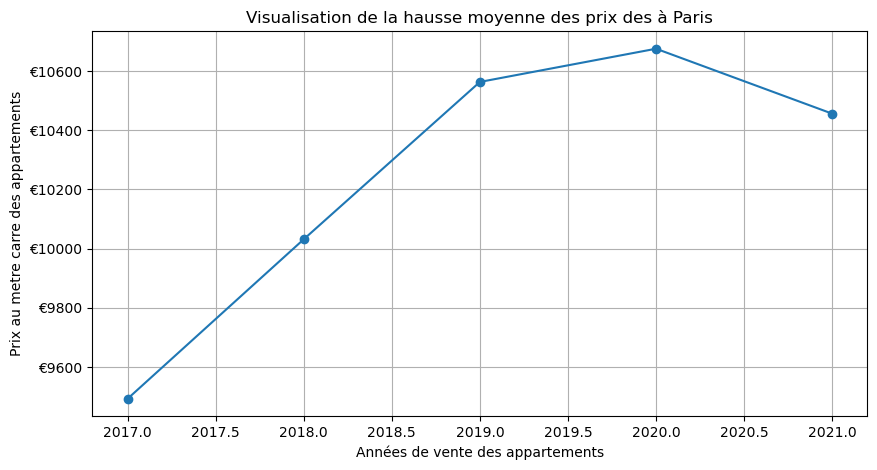

In [27]:
# Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,5))
plt.plot(df_appart_paris_annee['annee'], df_appart_paris_annee['prix_m2'], marker='o')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [30]:
# Liste des codes postaux dans nos données.
sorted(df_appart_paris['code_postal'].unique())

[75001,
 75002,
 75003,
 75004,
 75005,
 75006,
 75007,
 75008,
 75009,
 75010,
 75011,
 75012,
 75013,
 75014,
 75015,
 75016,
 75017,
 75018,
 75019,
 75020]

In [31]:
# Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_prix_arrondissement = df_appart_paris.groupby(['annee', 'code_postal']).agg({
    'prix_m2' : 'mean',
    'surface_reelle' : 'mean'
}).reset_index()
print(df_prix_arrondissement)

    annee  code_postal   prix_m2  surface_reelle
0    2017        75001 11,762.71           45.24
1    2017        75002 10,920.13           43.09
2    2017        75003 11,679.82           38.15
3    2017        75004 12,407.23           40.94
4    2017        75005 11,306.75           39.05
..    ...          ...       ...             ...
95   2021        75016 10,790.31           67.95
96   2021        75017 10,372.37           46.78
97   2021        75018  9,665.64           37.66
98   2021        75019  8,828.59           38.26
99   2021        75020  9,114.40           37.39

[100 rows x 4 columns]


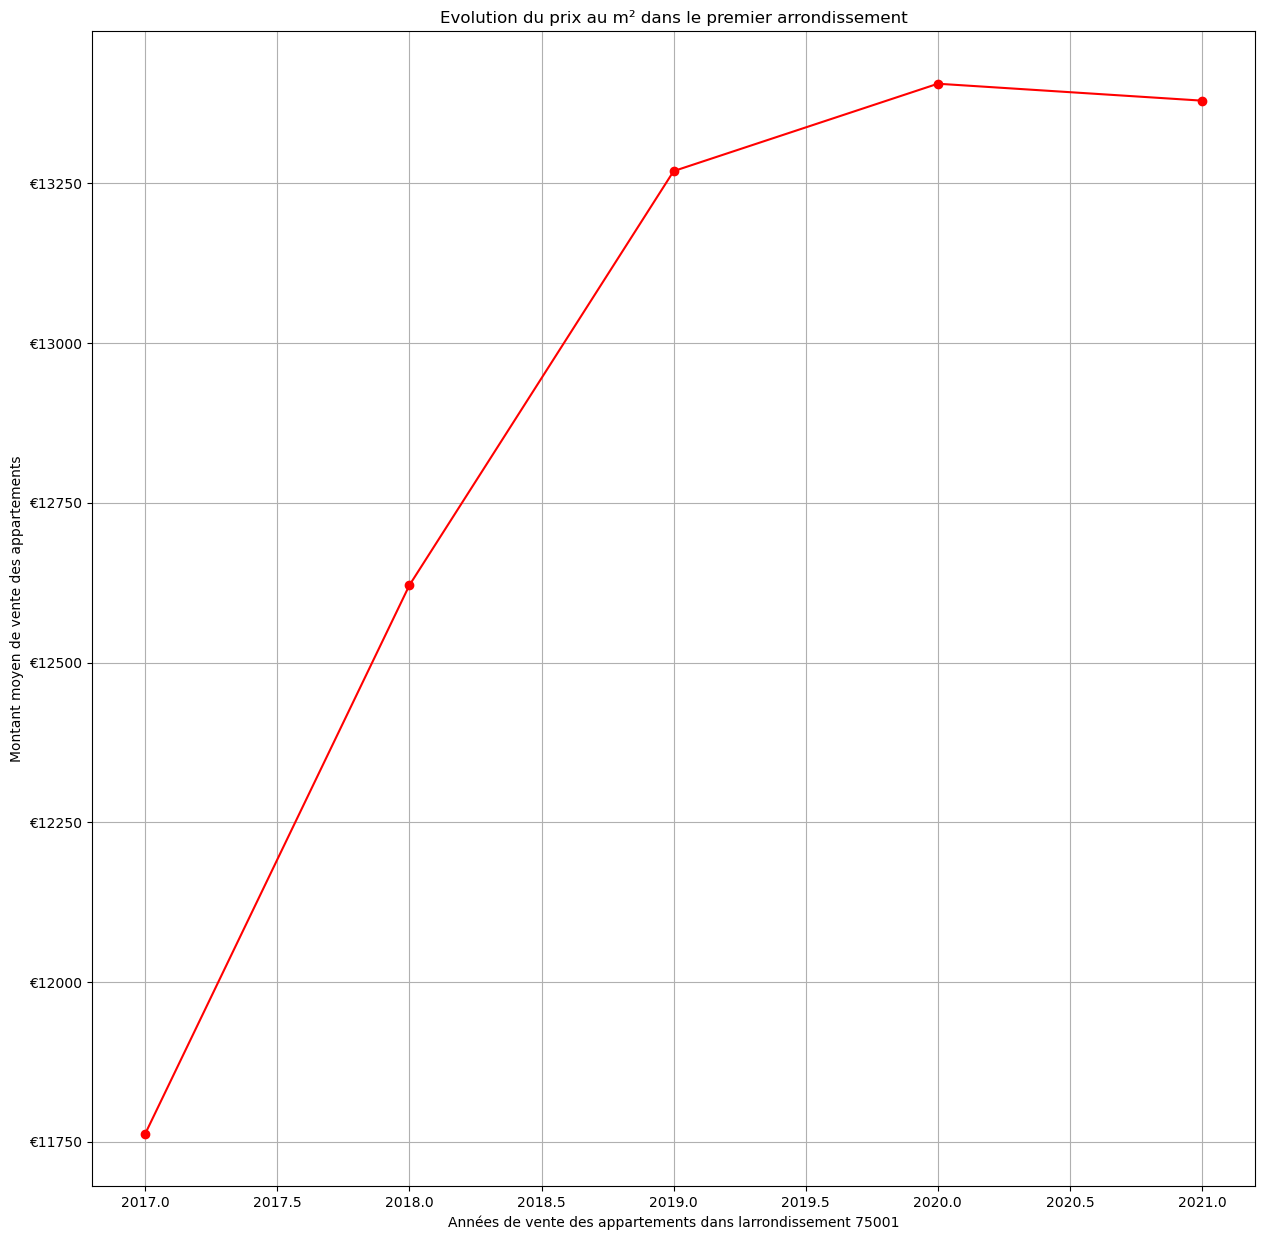

In [32]:
# Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
plt.plot(df_prix_arrondissement[df_prix_arrondissement['code_postal'] == 75001]['annee'], 
         df_prix_arrondissement[df_prix_arrondissement['code_postal'] == 75001]['prix_m2'],
         marker='o',
         color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

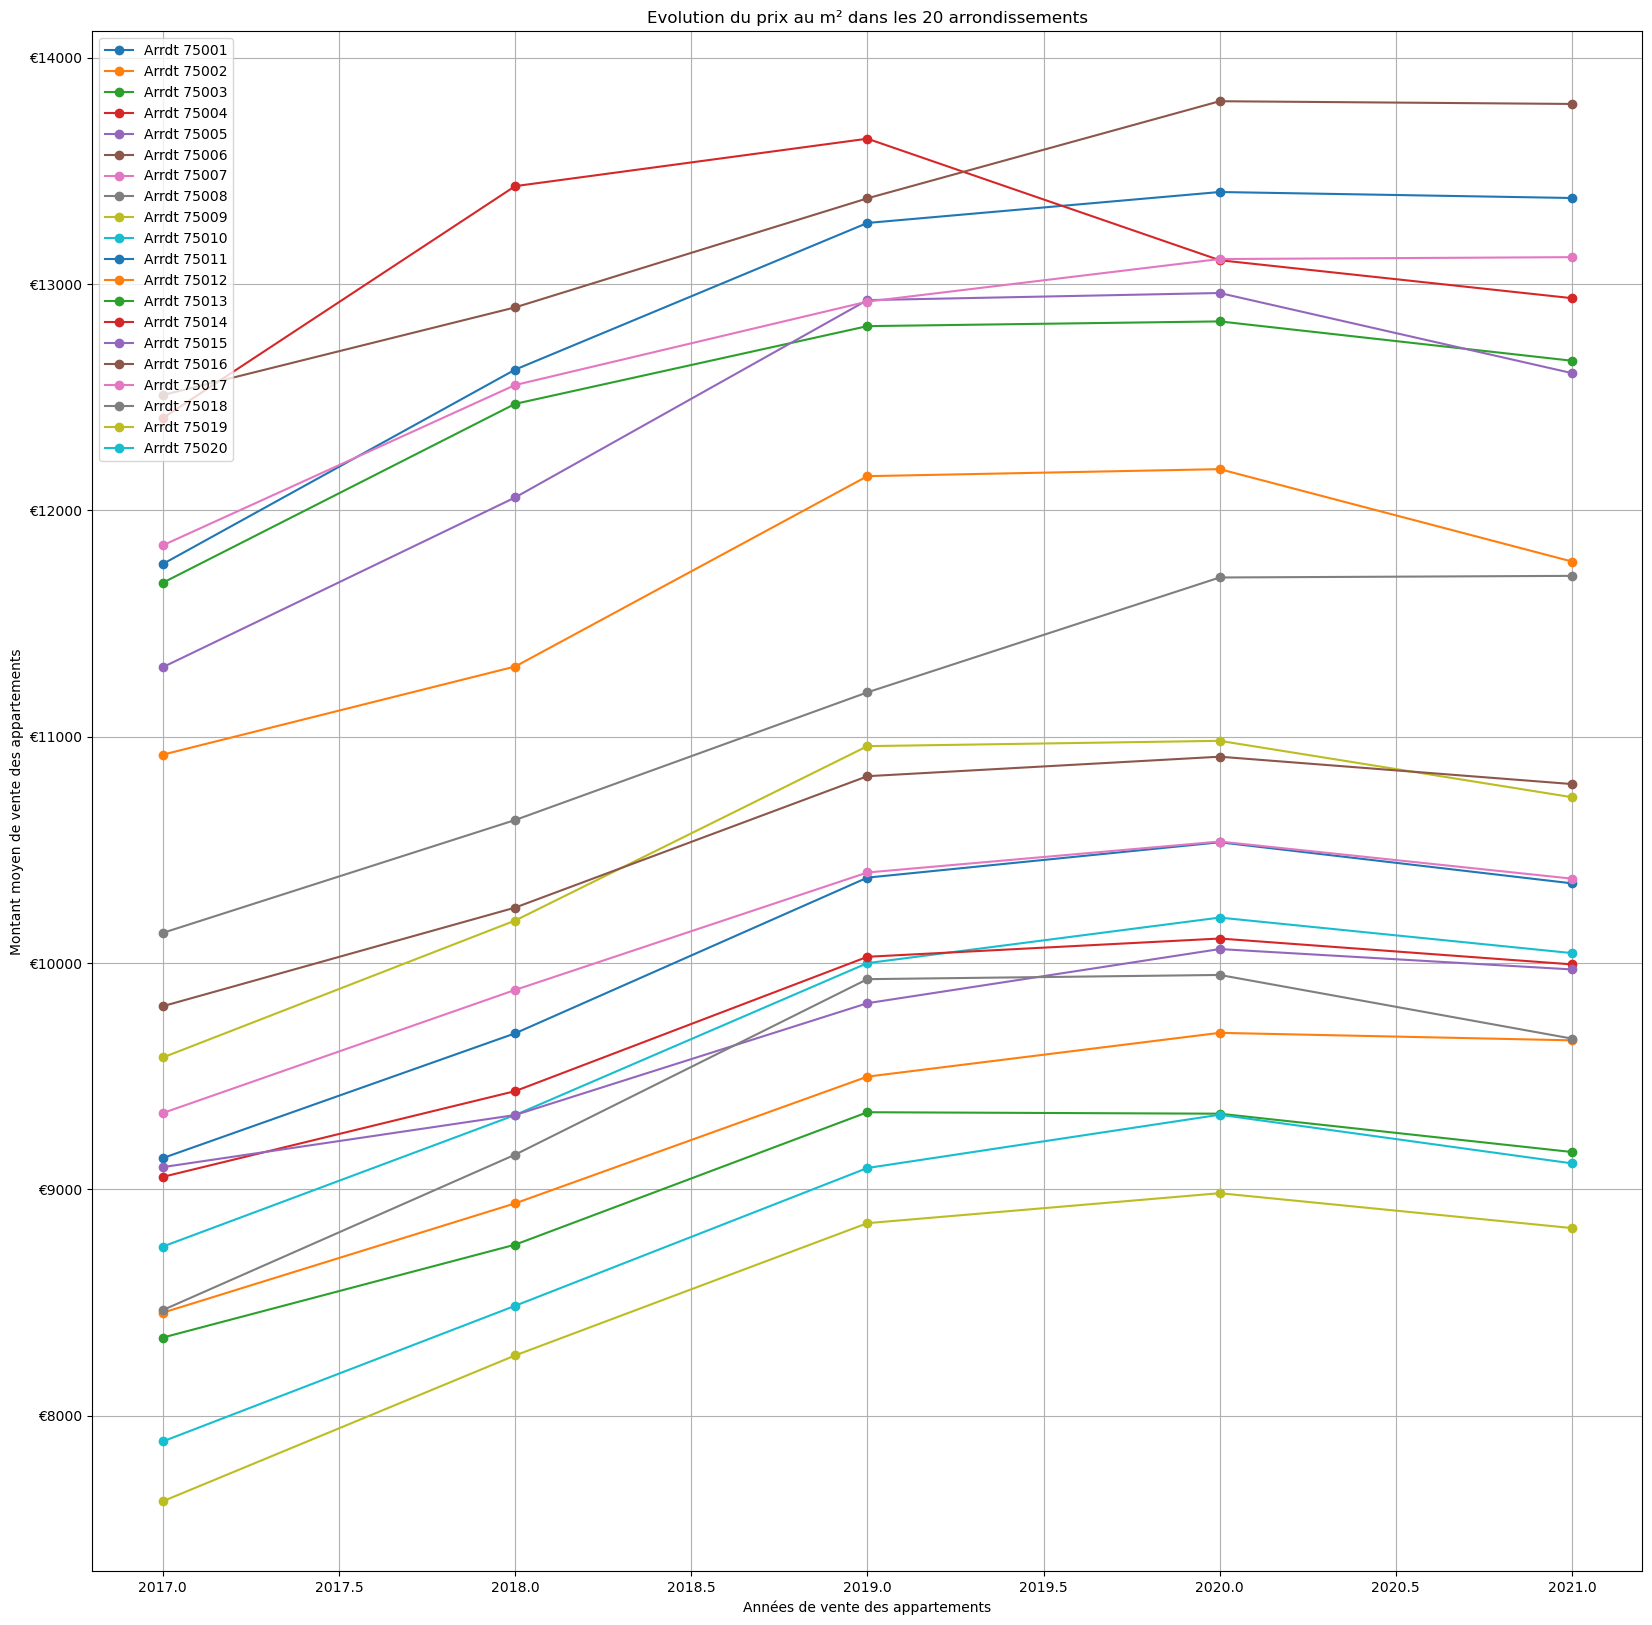

In [34]:
# On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(20,20))
interval_historique=['2017','2018','2019','2020','2021']

# Insérer les lignes à tracer ci-dessous
# Liste des arrondissements présents dans le DataFrame
arrondissements = df_prix_arrondissement['code_postal'].unique()

# Boucle sur chaque arrondissement
for code_postal in sorted(arrondissements):
    data = df_prix_arrondissement[df_prix_arrondissement['code_postal'] == code_postal]
    plt.plot(data['annee'], data['prix_m2'], marker='o', label=f'Arrdt {code_postal}')

# Paramètres du graphique 
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement que les prix augmentent réguilièrement sauf entre 2020 et 2021 ou ils baissent légèrement.

### 7. Prix au metre carré par transaction dans un arrondissement

In [37]:
# Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
nb_transactions_6e = df_appart_paris.loc[df['code_postal'] == 75006].shape[0]
print("Nombre de transactions dans le 6ᵉ arrondissement : ",nb_transactions_6e)


Nombre de transactions dans le 6ᵉ arrondissement :  709


In [38]:
# Affichons le nombre de transactions par arrondissement
df_transac_arrondissements = df_appart_paris.groupby('code_postal').size()
print(df_transac_arrondissements)

code_postal
75001     409
75002     666
75003     784
75004     548
75005     829
75006     709
75007     607
75008     628
75009     969
75010    1227
75011    1932
75012    1036
75013     870
75014    1248
75015    2308
75016    1947
75017    2212
75018    2805
75019    1091
75020    1528
dtype: int64


On constate que le nombre de transactions dans le 6ème est cohérent

Affichons l'historique des transactions pour visualiser la dispersion des données :

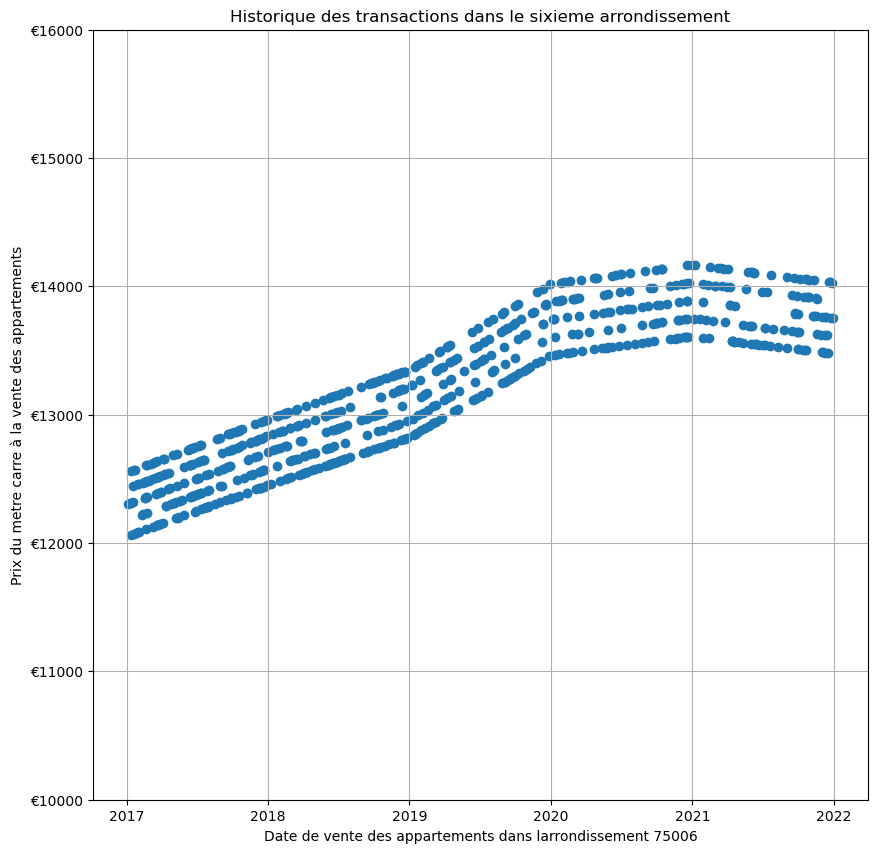

In [40]:
cp=75006
plt.figure(figsize=(10,10))
#Création du DF pour le 6ème arrondissement
df_6eme = df_appart_paris.loc[df['code_postal'] == cp]

#Insérer ci-dessous le scatter plot
plt.scatter(df_6eme['date_mutation'], df_6eme['prix_m2'])

#Paramètres du scatter plot
plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(10000, 16000)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que les prix entament une baisse à partir de 2021

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [44]:
# Transformation date mutation en nombre de jours depuis la 1ère date
dates_nb_jours = (df_6eme['date_mutation'] - df_6eme['date_mutation'].min()).dt.days

# On calcule la corrélation de Pearson (pas Spearman)
print(st.pearsonr(df_6eme['prix_m2'], dates_nb_jours))



PearsonRResult(statistic=0.9038446031381357, pvalue=7.108379235905991e-263)


Le coefficient de corrélation est de 0.9 avec une pvalue de 0 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [47]:
print(st.pearsonr(df_appart_paris['valeur_fonciere'], df_appart_paris['surface_reelle']))

PearsonRResult(statistic=0.9801182734209508, pvalue=0.0)


Le coefficient de corrélation est de 0.98 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [51]:
# On crée un dataset qui ne contient que les locaux commerciaux
df_loc_comm_paris = df.loc[df['code_type_local'] == 4, ['date_mutation', 'surface_reelle', 'code_postal', 'prix_m2', 'valeur_fonciere']]

In [52]:
# Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_loc_comm_paris['annee'] = df_loc_comm_paris['date_mutation'].dt.year
df_loc_comm_annee = df_loc_comm_paris.groupby('annee').agg({'prix_m2' : 'mean'}).reset_index()
print(df_loc_comm_annee)

   annee   prix_m2
0   2017 10,949.91
1   2018 11,569.50
2   2019 11,960.13
3   2020 11,966.47
4   2021 12,006.49


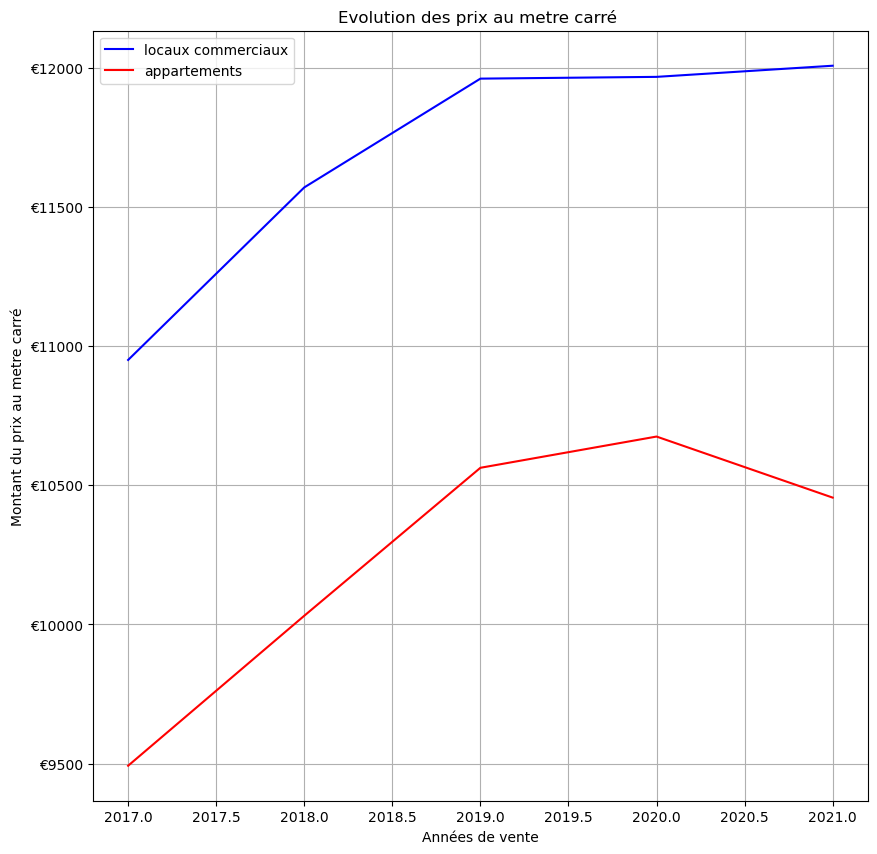

In [53]:
# Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(df_loc_comm_annee['annee'], df_loc_comm_annee['prix_m2'],label='locaux commerciaux',color='blue')
plt.plot(df_appart_paris_annee['annee'], df_appart_paris_annee['prix_m2'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est croissant même si la pente diminue fortement à partir de 2019

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entraîner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [59]:
# Rappel du DF initial
df.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,"550,559.68",8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,"11,011.19"
1,2017-01-12,"1,576,492.46",32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,"9,671.73"
2,2017-01-10,"657,757.36",52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,"9,966.02"
3,2017-01-10,"250,086.82",64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,"11,367.58"
4,2017-01-13,"176,266.71",25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,"11,751.11"


In [60]:
# Création de l'instance transformatrice
ohe = preprocessing.OneHotEncoder()

# Transformation code_postal en vecteur binaire avec OneHotEncoder
cp = ohe.fit_transform(df.code_postal.values.reshape(-1, 1)).toarray()
print(cp[:5])

# Création du DF "OneHotEncodé" : ajout des colonnes 75001 à 75019 (75020 si 19 autres arrondissements à 0)
colonnes_cp = [str(75000 + i) for i in range(1, 20)]
df_ohe = pd.concat([
    df, 
    pd.DataFrame(columns=colonnes_cp, data=cp[:, :19])],
    axis=1)
df_ohe.info()

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-nu

In [61]:
# Transformation code_type_local en vecteur binaire avec get_dummies
df_ohe = pd.get_dummies(df_ohe, columns=['type_local'])

# Création de la colonne année
df_ohe['annee'] = df_ohe['date_mutation'].dt.year

# Suppression des colonnes inutiles
df_ohe.drop(['date_mutation', 'adresse_numero', 'adresse_nom_voie', 'code_postal', 'nom_commune', 
            'code_type_local', 'prix_m2', 'type_local_Local industriel. commercial ou assimilé'], 
            axis=1, inplace=True)

df_ohe.info()
df_ohe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   valeur_fonciere         26196 non-null  float64
 1   surface_reelle          26196 non-null  int64  
 2   75001                   26196 non-null  float64
 3   75002                   26196 non-null  float64
 4   75003                   26196 non-null  float64
 5   75004                   26196 non-null  float64
 6   75005                   26196 non-null  float64
 7   75006                   26196 non-null  float64
 8   75007                   26196 non-null  float64
 9   75008                   26196 non-null  float64
 10  75009                   26196 non-null  float64
 11  75010                   26196 non-null  float64
 12  75011                   26196 non-null  float64
 13  75012                   26196 non-null  float64
 14  75013                   26196 non-null

,valeur_fonciere,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,...,75012,75013,75014,75015,75016,75017,75018,75019,type_local_Appartement,annee
0,"550,559.68",50,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2017
1,"1,576,492.46",163,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2017
2,"657,757.36",66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2017
3,"250,086.82",22,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2017
4,"176,266.71",15,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2017


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [63]:
# La valeur y à trouver est la valeur foncière

# Définition de X (variables de prédiction) et y (variable cible)
X = df_ohe.drop(columns=['valeur_fonciere'])
y = df_ohe['valeur_fonciere']

# On sépare le jeu de données entre echantillons d'apprentissage et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
# Création de l'instance "regression linéaire"
reg = LinearRegression()

# On entraîne l'algorithme ci-dessous 
reg.fit(X_train, y_train)

#et on effectue la prédiction
y_hat_test = reg.predict(X_test)

# Score
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_hat_test)}")

MAPE: 0.09494361290995061


Notre algorithme fait donc 9.5 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Niveau d'erreur acceptable 

Pour aller plus loin
- Optimiser le split "train_test"
- Retraiter periode Covid
- Faire une prévision par catégorie
- Obtenir des informations supplémentaires (nombre de pièces pour les appartements par exemple)

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [68]:
# On a importé (cellule 7) les données dans un dataframe
df_bien.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,"16,41",2,Appartement,25,1,"2,349593","48,863227"
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,"20,47",2,Appartement,22,1,"2,356977","48,867907"
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,"64,48",2,Appartement,65,3,"2,364855","48,859318"
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,"63,29",2,Appartement,74,2,"2,301586","48,868893"
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,"20,58",2,Appartement,22,1,"2,311643","48,87549"


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [70]:
# On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
# On a importé (cellule 7) la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction

# Transformation code_postal en vecteur binaire
cp_bien = ohe.fit_transform(df_bien.code_postal.values.reshape(-1, 1)).toarray()

# Création du DF "OneHotEncodé" : ajout des colonnes 75001 à 75019 (75020 si 19 autres arrondissements à 0)
colonnes_cp_bien = [str(75000 + i) for i in range(1, 20)]
df_ohe_bien = pd.concat([
    df_bien, 
    pd.DataFrame(columns=colonnes_cp_bien, data=cp_bien[:, :19])],
    axis=1)

# Transformation code_type_local en vecteur binaire
df_ohe_bien = pd.get_dummies(df_ohe_bien, columns=['type_local'])

# Création de la colonne année
df_ohe_bien['annee'] = 2023

# Suppression des colonnes inutiles
df_ohe_bien.drop(['adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune', 
                  'nom_commune', 'surface_carrez', 'code_type_local', 'nombre_pieces_principales', 
                  'longitude', 'latitude', 'type_local_Local industriel. commercial ou assimilé'], 
            axis=1, inplace=True)

# Renomme surface réelle
df_ohe_bien.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)
df_ohe.info()
df_ohe_bien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   valeur_fonciere         26196 non-null  float64
 1   surface_reelle          26196 non-null  int64  
 2   75001                   26196 non-null  float64
 3   75002                   26196 non-null  float64
 4   75003                   26196 non-null  float64
 5   75004                   26196 non-null  float64
 6   75005                   26196 non-null  float64
 7   75006                   26196 non-null  float64
 8   75007                   26196 non-null  float64
 9   75008                   26196 non-null  float64
 10  75009                   26196 non-null  float64
 11  75010                   26196 non-null  float64
 12  75011                   26196 non-null  float64
 13  75012                   26196 non-null  float64
 14  75013                   26196 non-null

In [71]:
df_ohe_bien.head()

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75012,75013,75014,75015,75016,75017,75018,75019,type_local_Appartement,annee
0,25,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2023
1,22,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2023
2,65,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2023
3,74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2023
4,22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2023


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [73]:
# On effectue la prédiction
X_bien = df_ohe_bien[X.columns]
y_hat_bien = reg.predict(X_bien)

# On ajoute la colonne de prédiction
df_ohe_bien['valeur_fonciere_predite'] = y_hat_bien

# On vérifie les 10 premières valeurs
df_ohe_bien.head(10)

# On exporte le DF en csv
df_ohe_bien.to_csv('Valorisation_future_bien_lpblp.csv', index=False)

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [75]:
# Création DF agrégé par type de local
df_valorisation_segments = df_ohe_bien.groupby(['type_local_Appartement']).agg({'valeur_fonciere_predite' : 'sum'})
print(df_valorisation_segments)

# Création variables pour les valorisations par type de local
valo_particuliers = df_valorisation_segments.loc[True, 'valeur_fonciere_predite']
valo_corporate = df_valorisation_segments.loc[False, 'valeur_fonciere_predite']


                        valeur_fonciere_predite
type_local_Appartement                         
False                             99,027,778.59
True                              72,342,349.43


In [76]:
# Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):', round(valo_particuliers/1000000,2))


la valorisation du segment particulier est (en millions deuros): 72.34


In [77]:
# Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):', round(valo_corporate/1000000,2))


la valorisation du segment corporate est (en millions deuros): 99.03


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment le plus valorisé est le "corporate" avec 99ME (soit 38% de plus que le segment particuliers)
- Cette estimation intègre la periode de Covid qui  a plus touché les biens immobiliers des particuliers que le corporate (voir cellule #53)

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [81]:
# Reconstitution DF test
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1)
df_test.head()


,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75013,75014,75015,75016,75017,75018,75019,type_local_Appartement,annee,valeur_fonciere
0,24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2018,"228,793.95"
1,16,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2018,"213,326.69"
2,29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,True,2020,"290,498.70"
3,80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,True,2018,"704,732.60"
4,80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,False,2020,"869,560.79"


In [82]:
# Création de la colonne prix au m²
df_test['prix_m2'] = df_test['valeur_fonciere'] / df_test['surface_reelle']
df_test.head()

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75014,75015,75016,75017,75018,75019,type_local_Appartement,annee,valeur_fonciere,prix_m2
0,24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,True,2018,"228,793.95","9,533.08"
1,16,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,True,2018,"213,326.69","13,332.92"
2,29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,True,2020,"290,498.70","10,017.20"
3,80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,True,2018,"704,732.60","8,809.16"
4,80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,False,2020,"869,560.79","10,869.51"


//Notebook initial// Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [84]:
# Création DF d'entrainement de K-means :

# Sélection 19ème arrondissement uniquement (document Louise)
df_test = df_test.loc[df_test['75019']==1]

# Suppression des colonnes inutiles
df_train_test = df_test[['prix_m2']]
df_train_test['code_postal'] = 75019
df_train_test.head()

C:\Users\remil\AppData\Local\Temp\ipykernel_15176\4272953875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_test['code_postal'] = 75019


,prix_m2,code_postal
14,"9,066.75",75019
52,"9,869.46",75019
78,"9,111.08",75019
158,"7,642.50",75019
183,"8,892.87",75019


In [85]:
# Application de Kmeans (2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_train_test)

C:\Users\remil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [86]:
# On vérifie les données de la prédiction
df_train_test['type_local_kmeans'] = kmeans.labels_
df_train_test.head(10)

C:\Users\remil\AppData\Local\Temp\ipykernel_15176\3944875188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_test['type_local_kmeans'] = kmeans.labels_


,prix_m2,code_postal,type_local_kmeans
14,"9,066.75",75019,1
52,"9,869.46",75019,1
78,"9,111.08",75019,1
158,"7,642.50",75019,0
183,"8,892.87",75019,1
214,"7,511.42",75019,0
218,"7,459.68",75019,0
223,"8,808.15",75019,1
247,"8,891.60",75019,1
252,"8,826.95",75019,1


In [87]:
# Suppression de type_local_kmeans pour masques identiques predict
df_train_test.drop(['type_local_kmeans'], 
            axis=1, inplace=True)
df_train_test.head()

C:\Users\remil\AppData\Local\Temp\ipykernel_15176\247565151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_test.drop(['type_local_kmeans'],


,prix_m2,code_postal
14,"9,066.75",75019
52,"9,869.46",75019
78,"9,111.08",75019
158,"7,642.50",75019
183,"8,892.87",75019


In [88]:
# On a importé (cellule 7) les données dans un dataframe
df_a_classer.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,"868687,0833",75019,Paris 19e Arrondissement,88
1,"452050,7622",75019,Paris 19e Arrondissement,45
2,"193088,6536",75019,Paris 19e Arrondissement,21
3,"303012,5494",75019,Paris 19e Arrondissement,32
4,"149272,2001",75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [90]:
# Conversion "valeur foncière" en nombre
df_a_classer['valeur_fonciere'] = pd.to_numeric(df_a_classer['valeur_fonciere'].str.replace(',', '.', regex=False), errors='coerce')

# Création de la colonne "prix au m2"
df_a_classer['prix_m2'] = df_a_classer['valeur_fonciere'] / df_a_classer['surface_reelle']

# Suppression colonnes inutiles
df_a_classer.drop(['valeur_fonciere', 'nom_commune', 'surface_reelle'], 
            axis=1, inplace=True)

df_a_classer = df_a_classer[['prix_m2','code_postal']]

df_a_classer.head()

,prix_m2,code_postal
0,"9,871.44",75019
1,"10,045.57",75019
2,"9,194.70",75019
3,"9,469.14",75019
4,"7,463.61",75019


In [91]:
# Définition et application du KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_train_test)

C:\Users\remil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [92]:
# Instanciation prédiction
estim_type = kmeans.predict(df_a_classer)
# Ajout de la prédiction au DF
df_a_classer['code_type_estime'] = pd.Series(estim_type, index=df_a_classer.index)
df_a_classer.head()

,prix_m2,code_postal,code_type_estime
0,"9,871.44",75019,1
1,"10,045.57",75019,1
2,"9,194.70",75019,1
3,"9,469.14",75019,1
4,"7,463.61",75019,0


In [93]:
# On affiche les résultats

# On affiche la valeur des 2 centroïdes
print(kmeans.cluster_centers_)


[[ 7790.32881959 75019.        ]
 [ 8871.54833625 75019.        ]]


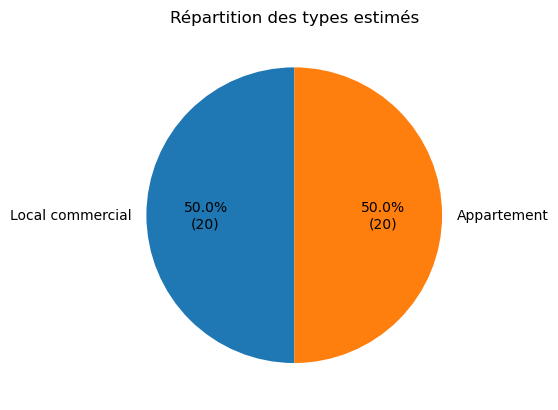

In [94]:
# On compte le nombre d'observations par type estimé (0 ou 1)
counts = df_a_classer['code_type_estime'].value_counts()

# On crée des labels lisibles
labels = ['Local commercial' if i == 1 else 'Appartement' for i in counts.index]

# Fonction personnalisée pour afficher pourcentage + effectif
def format_labels(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# On trace le camembert
plt.pie(counts, 
        labels=labels, 
        autopct=lambda pct: format_labels(pct, counts), 
        startangle=90)

plt.title("Répartition des types estimés")
plt.show()

//Notebook initial// Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [96]:
# On affiche les résultats

# On affiche le DF et la prédiction
df_a_classer['type_local_estime']= np.where(df_a_classer['code_type_estime'] == 0, 
                                            'Appartement', 
                                            'Local industriel. commercial ou assimilé')
df_a_classer.drop(['code_type_estime'], axis=1, inplace=True)
df_a_classer.head(10)


,prix_m2,code_postal,type_local_estime
0,"9,871.44",75019,Local industriel. commercial ou assimilé
1,"10,045.57",75019,Local industriel. commercial ou assimilé
2,"9,194.70",75019,Local industriel. commercial ou assimilé
3,"9,469.14",75019,Local industriel. commercial ou assimilé
4,"7,463.61",75019,Appartement
5,"9,982.02",75019,Local industriel. commercial ou assimilé
6,"9,674.26",75019,Local industriel. commercial ou assimilé
7,"7,348.92",75019,Appartement
8,"9,789.05",75019,Local industriel. commercial ou assimilé
9,"7,616.42",75019,Appartement


In [97]:
# On a importé la solution
df_classmt_solution.head()

,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,"868,687.08",75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,88
1,"452,050.76",75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,45
2,"193,088.65",75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,21
3,"303,012.55",75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,32
4,"149,272.20",75019,Paris 19e Arrondissement,2,Appartement,20


In [98]:
# On ajoute le type de local estimé 
df_classmt_solution['type_estime'] = df_a_classer['type_local_estime']

# On le compare à la solution et identifie les erreurs avec la valeur "1"
df_classmt_solution['controle'] = np.where(df_classmt_solution['type_estime'] == df_classmt_solution['type_local'], 0, 1)

# On somme la colonne, si la somme est nulle : OK
print("Le nombre total d'erreur(s) entre les prédictions de l'algorithme et la solution est de : ", sum(df_classmt_solution['controle']))

Le nombre total d'erreur(s) entre les prédictions de l'algorithme et la solution est de :  0


In [99]:
# Contrôle de la prédiction avec la matrice de confusion
confusion_matrix(df_classmt_solution['type_local'], df_classmt_solution['type_estime'])

array([[20,  0],
       [ 0, 20]], dtype=int64)

In [100]:
# On exporte le DF
df_a_classer.to_csv('estimation_type_local.csv', index=False)


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
Conlusion :
- Il a été possible de classer les biens entre "Appartement" et "Local industriel. commercial ou assimilé"
- Pourquoi ne pas utiliser un modèle supervisé sachant que l'historique nous donne l'information du type de local en fonction du prix au m²
Limites :
- L'algorithme n'a été entraîné que sur le 19e arrondissement
- Spécificités potentielles des biens non prises en compte
